In [70]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [97]:
summary = joblib.load("all.summary.jl")
bench = summary['bench']
refine_v = summary['refine_v']
refine_r = summary['refine_r']
# Cleaning
del(bench['TP-comp_TP-gt'])
del(bench['TP-comp_FP-gt'])
del(bench['TP-base_TP-gt'])
del(bench['TP-base_FP-gt'])
del(bench['gt_matrix'])
del(bench['weighted'])
del(refine_v['TP-comp_TP-gt'])
del(refine_v['TP-comp_FP-gt'])
del(refine_v['TP-base_TP-gt'])
del(refine_v['TP-base_FP-gt'])
del(refine_v['gt_concordance'])
del(refine_v['gt_matrix'])



bench['analysis'] = 'bench'
refine_v['analysis'] = 'refine variant'
refine_r['analysis'] = 'refine regions'
tmp = refine_r.rename(columns={'PPV':'precision', 'TPR':'recall'})
sub_cols = ['index', 'precision', 'recall', 'analysis']
view = pd.concat([bench.reset_index()[sub_cols], 
                  refine_v.reset_index()[sub_cols],
                  tmp.reset_index()[sub_cols]
                 ])

var_summaries = pd.concat([bench, refine_v])

In [87]:
tools_wgs = ['hipstr', 'gangstr', 'trgt', 'medakaTR', 'deepvariant', 'biograph', 'sniffles', 'GIABv4.2.1']
tools_subset = ['hipstr_sub', 'GIABv4.2.1_sub']

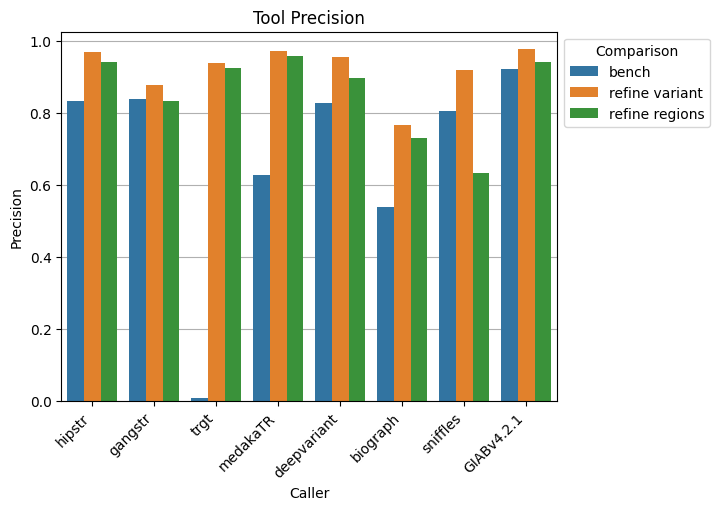

In [88]:
p = sb.barplot(data=view, x="index", y='precision', hue='analysis',
          order=tools_wgs)
plt.xticks(rotation=45, ha='right')
p.set_axisbelow(True)
p.set(title="Tool Precision", xlabel="Caller", ylabel="Precision")
plt.grid(axis='y')
plt.legend(title="Comparison")
_ = sb.move_legend(p, "upper left", bbox_to_anchor=(1, 1))

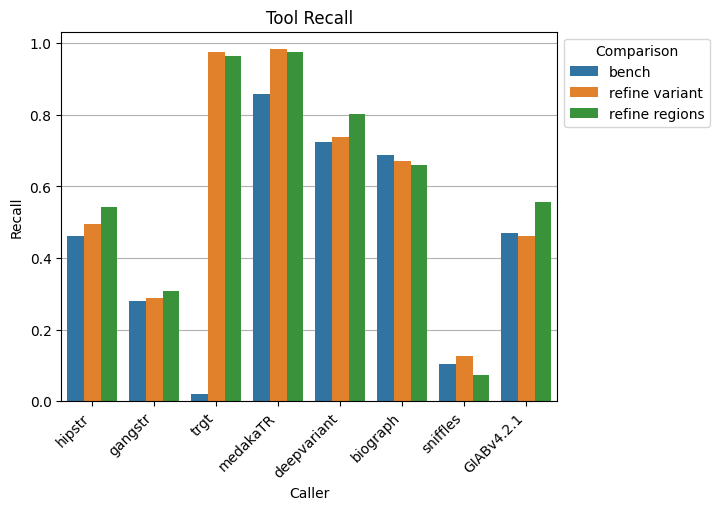

In [89]:
p = sb.barplot(data=view, x="index", y='recall', hue='analysis',
          order=tools_wgs)
plt.xticks(rotation=45, ha='right')
p.set_axisbelow(True)
p.set(title="Tool Recall", xlabel="Caller", ylabel="Recall")
plt.grid(axis='y')
plt.legend(title="Comparison")
_ = sb.move_legend(p, "upper left", bbox_to_anchor=(1, 1))

# Question 1
  - How much of a difference does refine make on the results?
  - Highlight how that some of these tools based on a catalog. Some of the catalogs are subsets of our full catalog and of the benchmark regions.

In [90]:
new_rows = []
for grp, d in view[view['analysis'].isin(['bench', 'refine variant'])].groupby('index'):
    a = d[d['analysis'] == 'bench']
    b = d[d['analysis'] == 'refine variant']
    diff = b[['precision', 'recall']] - a[['precision', 'recall']]
    new_rows.append([grp, diff['precision'].iloc[0], diff['recall'].iloc[0]])
diff = pd.DataFrame(new_rows, columns=['tool', 'precision', 'recall'])
diff

,tool,precision,recall
0,GIABv4.2.1,0.054471,-0.008667
1,GIABv4.2.1_sub,0.064250,0.525365
2,GIABverkko,0.183148,0.066636
3,GIABverkko_sub,0.182343,0.066260
4,biograph,0.227869,-0.017976
5,deepvariant,0.127615,0.013343
6,gangstr,0.039069,0.007161
7,hipstr,0.136405,0.032501
8,hipstr_sub,0.474411,0.631889
9,medakaTR,0.344525,0.125464


In [91]:
diff[diff['tool'].isin(tools_wgs)].describe()

,precision,recall
count,8.000000,8.000000
mean,0.247099,0.141324
std,0.293817,0.332128
min,0.039069,-0.017976
25%,0.099313,0.003204
50%,0.132010,0.018037
75%,0.257033,0.055742
max,0.932577,0.956035


In [104]:
diff[diff['tool'].isin(['GIABv4.2.1_sub', 'GIABv4.2.1', 'biograph'])]

,tool,precision,recall
0,GIABv4.2.1,0.054471,-0.008667
1,GIABv4.2.1_sub,0.064250,0.525365
4,biograph,0.227869,-0.017976


In [93]:
diff[~diff['tool'].isin(tools_wgs)]

,tool,precision,recall
1,GIABv4.2.1_sub,0.064250,0.525365
2,GIABverkko,0.183148,0.066636
3,GIABverkko_sub,0.182343,0.066260
8,hipstr_sub,0.474411,0.631889


In [102]:
var_summaries

,TP-base,TP-comp,FP,FN,precision,recall,f1,base cnt,comp cnt,gt_concordance,analysis
biograph,95878,94076,79743,43494,0.54123,0.687929,0.605825,139372,173819,0.700221,bench
deepvariant,100990,101576,21074,38382,0.828178,0.724608,0.772939,139372,122650,0.950136,bench
gangstr,39220,39227,7458,100152,0.840248,0.281405,0.42161,139372,46685,0.943432,bench
hipstr,64489,65379,13079,74883,0.833299,0.462711,0.595021,139372,78458,0.955062,bench
medakaTR,119484,141946,83935,19888,0.628411,0.857303,0.725225,139372,225881,0.673566,bench
sniffles,14599,12750,3075,124773,0.805687,0.104748,0.185394,139372,15825,0.812078,bench
GIABv4.2.1,65521,65731,5446,73851,0.923487,0.470116,0.623055,139372,71177,0.975674,bench
GIABverkko,127909,128380,32075,11463,0.8001,0.917752,0.854897,139372,160455,0.965696,bench
trgt,2707,2783,313935,136665,0.008787,0.019423,0.0121,139372,316718,0.908732,bench
hipstr_sub,1837,1856,108467,137535,0.016823,0.013181,0.014781,139372,110323,0.959591,bench


In [101]:
var_summaries.loc[['biograph', 'GIABv4.2.1']]

,TP-base,TP-comp,FP,FN,precision,recall,f1,base cnt,comp cnt,gt_concordance,analysis
biograph,95878,94076,79743,43494,0.54123,0.687929,0.605825,139372,173819,0.700221,bench
biograph,104575.0,102627.0,30811.0,51518.0,0.769099,0.669953,0.716111,156093.0,133438.0,NaN,refine variant
GIABv4.2.1,65521,65731,5446,73851,0.923487,0.470116,0.623055,139372,71177,0.975674,bench
GIABv4.2.1,70274,70498,1589,82016,0.977957,0.461449,0.627032,152290,72087,NaN,refine variant


### Variant count difference before/after refine

In [111]:
b

,bench base cnt,bench comp cnt
18,152290,72087


In [119]:
new_rows = []
for grp, d in var_summaries[var_summaries['analysis'].isin(['bench', 'refine variant'])].reset_index().groupby('index'):
    a = d[d['analysis'] == 'bench'][['base cnt', 'comp cnt']].reset_index(drop=True)
    b = d[d['analysis'] == 'refine variant'][['base cnt', 'comp cnt']].reset_index(drop=True)
    diff = b - a
    diff = pd.concat([a, b, diff], axis=1)
    diff['tool'] = grp
    new_rows.append(diff)

diff = pd.concat(new_rows)
diff.set_index('tool').loc[tools_wgs].astype(int)

,base cnt,comp cnt,base cnt,comp cnt,base cnt,comp cnt
tool,,,,,,
hipstr,139372,78458,143090,74038,3718,-4420
gangstr,139372,46685,142321,46701,2949,16
trgt,139372,316718,154183,160909,14811,-155809
medakaTR,139372,225881,152035,175396,12663,-50485
deepvariant,139372,122650,155810,120885,16438,-1765
biograph,139372,173819,156093,133438,16721,-40381
sniffles,139372,15825,148243,18538,8871,2713
GIABv4.2.1,139372,71177,152290,72087,12918,910


In [121]:
refine_r.loc[tools_wgs]

,TP,TN,FP,FN,base P,base N,comp P,comp N,PPV,TPR,TNR,NPV,ACC,BA,F1,UND,analysis
hipstr,57734.0,1598872.0,2184.0,48465.0,106461.0,1600392.0,61214.0,1645639.0,0.943150,0.542302,0.999050,0.971581,0.970562,0.770676,0.688642,3.0,refine regions
gangstr,32546.0,1597841.0,5171.0,72931.0,105843.0,1601010.0,38960.0,1667893.0,0.835370,0.307493,0.998021,0.958000,0.955201,0.652757,0.449521,11.0,refine regions
trgt,103465.0,1594222.0,7418.0,2332.0,107253.0,1599600.0,111634.0,1595219.0,0.926823,0.964682,0.996638,0.999375,0.994630,0.980660,0.945374,15.0,refine regions
medakaTR,102241.0,1599554.0,3887.0,1760.0,104858.0,1601995.0,106646.0,1600207.0,0.958695,0.975042,0.998476,0.999592,0.997037,0.986759,0.966800,17.0,refine regions
deepvariant,86163.0,1598517.0,4385.0,20638.0,107376.0,1599477.0,95936.0,1610917.0,0.898130,0.802442,0.999400,0.992303,0.987009,0.900921,0.847594,2.0,refine regions
biograph,70847.0,1591110.0,19582.0,33890.0,107159.0,1599694.0,96990.0,1609863.0,0.730457,0.661139,0.994634,0.988351,0.973697,0.827887,0.694071,28.0,refine regions
sniffles,7593.0,1601681.0,731.0,97424.0,105081.0,1601772.0,11949.0,1694904.0,0.635451,0.072259,0.999943,0.944998,0.942831,0.536101,0.129762,7.0,refine regions
GIABv4.2.1,58200.0,1601947.0,1149.0,45949.0,104340.0,1602513.0,61654.0,1645199.0,0.943978,0.557792,0.999647,0.973710,0.972636,0.778719,0.701230,1.0,refine regions


# Question 2
How informative are the reports?
  - Can we use variant / region / laytr to get a better understanding of what any particular tool is doing?
  - Want to bring attention to the subsets stratifications.

# Question 3
Are there sites inaccessible from one technology / technique vs another?
  - I bet there are sites where non-nist WGS all miss but every TR caller captures
  - I bet there are sites long reads capture but none of the short reads capture
  
Take the refine.regions.txt from all tools and combine like how I'm doing for Q4.
Perform queries based on path.txt metadata's sequencing,  Caller Type,  Sequencing, Locations.

Where do each subset all agree / disagree with one another.

wgs vs catalog (pretty much same as TR vs non-TR). 
Short-reads vs long reads


In [162]:
import os
def region_loader(path, name):
    full_path = os.path.join(path, 'refine.regions.txt')
    benchmark_regions = pd.read_csv(full_path, 
                                #names=["chrom", "start", "end", "tier", "repl", "vflag", "entropy", "ad1", "ad2"],
                                sep='\t').set_index(["chrom", "start", "end"])
    benchmark_regions.columns = [f'{c}_{name}' for c in benchmark_regions.columns]
    return benchmark_regions
paths = pd.read_csv("paths.txt", sep='\t')
paths = paths[paths['program'].isin(['biograph', 
                                     'deepvariant', 
                                     'gangstr', 
                                     'hipstr', 
                                     'medakaTR', 
                                     'sniffles', 
                                     'trgt', 
                                     'GIABv4.2.1'])]
parts = []
for _, i in paths.iterrows():
    parts.append(region_loader(i['path'], i['program']))
data = pd.concat(parts, axis=1)

In [188]:
# When doing the agreement, we want for all tier1 sites as well as for all >=5bp

# Lets repeat all of that with Tier1 (COMMENT1)
benchmark_regions = pd.read_csv("/Users/english/code/adotto/benchmark/GIABTR_benchmark.6.26/GIABTR.HG002.benchmark.regions.bed.gz", 
                                names=["chrom", "start", "end", "tier", "repl", "vflag", "entropy", "ad1", "ad2"],
                                sep='\t').set_index(["chrom", "start", "end"])
t1_index = benchmark_regions[benchmark_regions['tier'] == 'Tier1'].index

def is_gt5(x):
    return (x & 0x1) != 0
gt5_index = benchmark_regions[(benchmark_regions['tier'] == 'Tier1') & benchmark_regions['vflag'].apply(is_gt5)].index


In [163]:
def within_set_agree(m_data, m_set):
    # Do the state_name agree / disagree within a set. Returns a True/False
    return m_data['state_' + m_set[0]] == m_data['state_' + m_set[1]]

In [164]:
### short vs long read TR callers
sr_cols = ['state_gangstr', 'state_hipstr']
sr_callers_agree = within_set_agree(data,['gangstr', 'hipstr'])
lr_callers_agree = within_set_agree(data, ['trgt', 'medakaTR'])

In [165]:
sr_callers_agree.value_counts()

True     1666643
False      40210
dtype: int64

In [190]:
sr_callers_agree[sr_callers_agree.index.isin(t1_index)].value_counts()

True     1600717
False      37791
dtype: int64

In [191]:
sr_callers_agree[sr_callers_agree.index.isin(gt5_index)].value_counts()

True     67706
False    33998
dtype: int64

In [166]:
lr_callers_agree.value_counts()

True     1692724
False      14129
dtype: int64

In [192]:
lr_callers_agree[lr_callers_agree.index.isin(t1_index)].value_counts()

True     1628832
False       9676
dtype: int64

In [193]:
lr_callers_agree[lr_callers_agree.index.isin(gt5_index)].value_counts()

True     98044
False     3660
dtype: int64

In [ ]:
# Now let's check between them

In [199]:
data[sr_callers_agree & lr_callers_agree][['state_hipstr', 'state_trgt']].value_counts().unstack().fillna(0).astype(int)

state_trgt,FN,"FN,FP",FP,TN,TP,UNK
state_hipstr,,,,,,
FN,319,192,195,282,39219,0
"FN,FP",0,51,4,0,31,0
FP,0,0,325,32,3,0
TN,4,3,360,1587334,159,3
TP,6,2,8,6,26749,0


In [200]:
data[sr_callers_agree & lr_callers_agree & data.index.isin(t1_index)][['state_hipstr', 'state_trgt']].value_counts().unstack().fillna(0).astype(int)

state_trgt,FN,"FN,FP",FP,TN,TP,UNK
state_hipstr,,,,,,
FN,188,58,107,111,38294,0
"FN,FP",0,13,0,0,30,0
FP,0,0,176,17,2,0
TN,0,0,279,1526723,22,3
TP,5,1,2,3,26480,0


In [201]:
data[sr_callers_agree & lr_callers_agree & data.index.isin(gt5_index)][['state_hipstr', 'state_trgt']].value_counts().unstack().fillna(0).astype(int)

state_trgt,FN,"FN,FP",FP,TN,TP
state_hipstr,,,,,
FN,188,58,107,110,38279
"FN,FP",0,13,0,0,30
FP,0,0,41,0,2
TN,0,0,0,10,0
TP,5,1,2,3,26479


For the lr TP but sr F*, can you find any patterns about why they're  different from the ~sr_lr_diff?
e.g. Are they different motif sizes or something?

Load the full benchmark and catalog.
Generate the lrTP and srF sets (index)
Then just explore.

In [207]:
view = data[sr_callers_agree & lr_callers_agree & data.index.isin(gt5_index)]
any_sr = view['state_hipstr'].str.startswith('T')
any_lr = view['state_trgt'].str.startswith('T')
to_investigate = any_lr & ~any_sr

In [208]:
benchmark_regions['long-read only'] = to_investigate

In [214]:
benchmark_regions['max_allele_delta'] = benchmark_regions[['ad1', 'ad2']].max(axis=1)

In [270]:
s = benchmark_regions.reset_index()
x = (s['end'] - s['start']).to_frame().set_index(benchmark_regions.index)
benchmark_regions['span'] = x

In [275]:
# Want to load the catalog and also do this grouping for the mean purity of the repeats
catalog = (pd.read_csv("/Users/english/code/adotto/regions/adotto_TRregions_v1.1.bed", sep='\t')
           .rename(columns={'chr':'chrom'})
           .set_index(['chrom', 'start', 'end']))
benchmark_regions = benchmark_regions.join(catalog['mu_purity'])

In [279]:
view = (benchmark_regions
         .loc[gt5_index]
         .groupby('long-read only')
         [['max_allele_delta', 'entropy', 'span', 'mu_purity']])
         
view.describe().T

long-read only                 False         True 
max_allele_delta count  26907.000000  38421.000000
                 mean      15.252982    105.858281
                 std      187.866005    398.183841
                 min        5.000000      5.000000
                 25%        6.000000     11.000000
                 50%        9.000000     23.000000
                 75%       14.000000     58.000000
                 max    23711.000000  19455.000000
entropy          count  26907.000000  38421.000000
                 mean       0.886983      0.845731
                 std        0.059281      0.108862
                 min        0.432595      0.279315
                 25%        0.852418      0.772660
                 50%        0.891617      0.864914
                 75%        0.927313      0.933365
                 max        0.999783      0.999886
span             count  26907.000000  38421.000000
                 mean     146.325900    395.505375
                 std      728.897920    558.124188
                 min       24.000000     22.000000
                 25%       81.000000    125.000000
                 50%       91.000000    226.000000
                 75%      103.000000    475.000000
                 max    49865.000000  23939.000000
mu_purity        count  26907.000000  38421.000000
                 mean      95.587096     92.519794
                 std        2.597941      3.161719
                 min       70.000000     67.000000
                 25%       94.000000     90.000000
                 50%       96.000000     93.000000
                 75%       98.000000     95.000000
                 max      100.000000    100.000000

In [285]:
view = benchmark_regions.loc[gt5_index]
lro = view[view['long-read only'] == True]
both = view[view['long-read only'] == False]

In [286]:
len(view), len(lro), len(both)

(101704, 38421, 26907)

In [288]:
view

tier      repl  vflag   entropy   ad1   ad2  \
chrom start    end                                                      
chr1  839177   839680    Tier1  TP_TP_TP     15  0.888568    42    42   
      853415   853930    Tier1  TP_TP_TP     15  0.994038    49    49   
      866379   867217    Tier1  TP_TP_TP     15  0.909686   147   147   
      875804   876462    Tier1  TP_TP_TP     15  0.783123  2500  2490   
      893609   894168    Tier1  TP_TP_TP     15  0.987499    36    36   
...                        ...       ...    ...       ...   ...   ...   
chrY  16224326 16224387  Tier1    _TN_TN     13  0.829391     0    10   
      16242252 16242574  Tier1    _TN_TN     15  0.583387     0    12   
      18840610 18840711  Tier1  TN_TN_TN     13  0.790925     0    12   
      18844598 18844734  Tier1  TN_TN_TN     13  0.940220     0     6   
      21513449 21513606  Tier1    _TN_TN     13  0.882115     0    10   

                        long-read only  max_allele_delta  span  mu_purity  
chrom start    end                                                         
chr1  839177   839680             True                42   503         96  
      853415   853930             True                49   515         99  
      866379   867217             True               147   838         95  
      875804   876462             True              2500   658         95  
      893609   894168              NaN                36   559         94  
...                                ...               ...   ...        ...  
chrY  16224326 16224387          False                10    61         94  
      16242252 16242574            NaN                12   322         93  
      18840610 18840711            NaN                12   101         92  
      18844598 18844734            NaN                 6   136         98  
      21513449 21513606            NaN                10   157         92  

[101704 rows x 10 columns]

In [ ]:
# Wilcoxon rank-sum

In [294]:
from scipy.stats import ranksums

check = [('greater', 'max_allele_delta'),
         ('greater', 'span'),
         ('less', 'mu_purity'),
         ('less', 'entropy')]
rows = []
for alt, c in check:
    result = ranksums(lro[c], both[c], alternative=alt)
    lstat = lro[c].describe()
    bstat = both[c].describe()
    rows.append([c, 
                 bstat['mean'], bstat['std'], bstat['50%'],
                 lstat['mean'], lstat['std'], lstat['50%'],
                 alt, result.pvalue, result.statistic])
result = pd.DataFrame(rows, columns=['annotation', 'both mean', 'both std', 'both median',
                                     'long-read only mean', 'long-read only std', 'long-read only median',
                                     'alternate', 'p-value', 'statistic'])
result.set_index('annotation')

,both mean,both std,both median,long-read only mean,long-read only std,long-read only median,alternate,p-value,statistic
annotation,,,,,,,,,
max_allele_delta,15.252982,187.866005,9.000000,105.858281,398.183841,23.000000,greater,0.0,118.628236
span,146.325900,728.897920,91.000000,395.505375,558.124188,226.000000,greater,0.0,135.085086
mu_purity,95.587096,2.597941,96.000000,92.519794,3.161719,93.000000,less,0.0,-120.566350
entropy,0.886983,0.059281,0.891617,0.845731,0.108862,0.864914,less,0.0,-39.609231


Group the HG002 ≥5bp Regions by if ANY of the WGS callers (DeepVariant, BioGraph, Sniffles) match the variant

In [226]:
any_hip = data['state_hipstr'].str.startswith('T')
any_gang = data['state_gangstr'].str.startswith('T')
any_trgt = data['state_trgt'].str.startswith('T')
any_medaka = data['state_medakaTR'].str.startswith('T')
any_bg = data['state_biograph'].str.startswith('T')
any_snif = data['state_sniffles'].str.startswith('T')
any_dv = data['state_deepvariant'].str.startswith('T')

non_tr = any_dv | any_bg | any_snif
the_tr = any_hip | any_gang | any_trgt | any_medaka

In [227]:
(non_tr & ~the_tr).value_counts()

False    1706333
True         520
dtype: int64

In [228]:
(~non_tr & the_tr).value_counts()

False    1695796
True       11057
dtype: int64

In [231]:
non_tr_sub = non_tr[non_tr.index.isin(gt5_index)]
the_tr_sub = the_tr[the_tr.index.isin(gt5_index)]

In [234]:
len(non_tr_sub)

101704

In [232]:
(non_tr_sub & ~the_tr_sub).value_counts()

False    101554
True        150
dtype: int64

In [233]:
(~non_tr_sub & the_tr_sub).value_counts()

False    91400
True     10304
dtype: int64

In [235]:
(non_tr_sub & the_tr_sub).value_counts()

True     90846
False    10858
dtype: int64

# Question 4
How many locations are universally FP or FN?
  - These may be indicative of low quality sites to remove from the benchmark.

In [236]:
(~non_tr & ~the_tr).value_counts()

False    1705959
True         894
dtype: int64

In [246]:
benchmark_regions[(~non_tr & ~the_tr)]['tier'].value_counts()

Tier2    490
Tier1    404
Name: tier, dtype: int64

In [248]:
benchmark_regions[(~non_tr & ~the_tr)].groupby('tier')['vflag'].value_counts().unstack()

vflag,5,9,11,13,14,15
tier,,,,,,
Tier1,2.0,NaN,NaN,119.0,NaN,283.0
Tier2,3.0,4.0,5.0,121.0,1.0,356.0


In [240]:
any_nist = data['state_GIABv4.2.1'].str.startswith('T')
(~non_tr & ~the_tr & ~any_nist).value_counts()

False    1705965
True         888
dtype: int64

In [241]:
894 / len(data), len(data)

(0.0005237709398524653, 1706853)

In [260]:
# What about non-universal but many disagreement?
disagree = pd.concat([
    any_hip,
    any_gang,
    any_trgt,
    any_medaka,
    any_bg,
    any_snif,
    any_dv,
    any_nist], axis=1)

In [261]:
disagree['Match Benchmark Count'] = disagree.sum(axis=1)
disagree['tier'] = benchmark_regions['tier']
disagree['vflag'] = benchmark_regions['vflag']

[Text(0.5, 1.0, 'Number of Callers matching to the benchmark')]

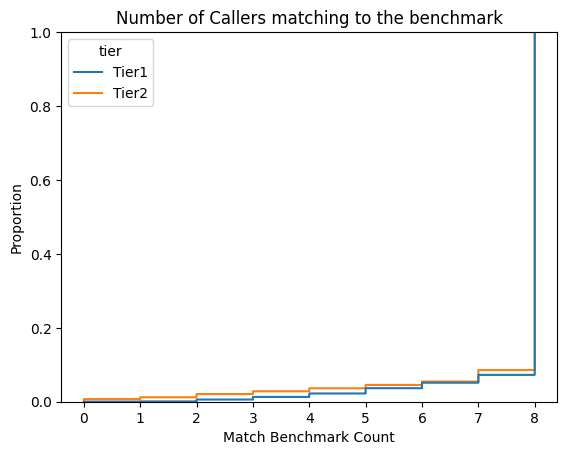

In [262]:
p = sb.ecdfplot(data=disagree, x='Match Benchmark Count', hue='tier')
p.set(title="Number of Callers matching to the benchmark")

[Text(0.5, 1.0, 'Number of Callers matching to the benchmark (HG002>=5bp)')]

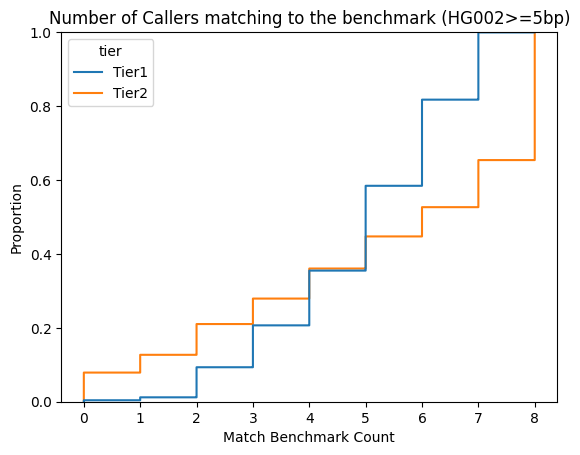

In [265]:
p = sb.ecdfplot(data=disagree[disagree['vflag'].apply(lambda x: x & 0x1 != 0)], x='Match Benchmark Count', hue='tier')
p.set(title="Number of Callers matching to the benchmark (HG002>=5bp)")

In [267]:
disagree.reset_index().to_csv('giabtr_caller_agreement_data.txt', sep='\t', index=False)

In [ ]:
# Trash Notes

In [20]:
nist = pd.read_csv("nist_results/bench_results/HG002_GRCh38_v4.2.1_phased_noregions/refine.regions.txt", sep='\t')
hipstr = pd.read_csv("hipstr_results/wg_compare_Jul_2023/refine.regions.txt", sep='\t')
verkko = pd.read_csv("nist_results/bench_results/GRCh38_HG2-verrkoV1.1-V0.7_dipcall-z2k_noregions/refine.regions.txt",  sep='\t')
medaka = pd.read_csv("medakaTR_results/bench_result/refine.regions.txt", sep='\t')

nist = nist.set_index(["chrom", "start", "end"])
nist = nist[nist.index.isin(t1_index)]
nist.columns = [_ + '_nistv4' for _ in nist.columns]

hipstr = hipstr.set_index(["chrom", "start", "end"])
hipstr = hipstr[hipstr.index.isin(t1_index)]
hipstr.columns = [_ + '_hipstr' for _ in hipstr.columns]

verkko = verkko.set_index(["chrom", "start", "end"])
verkko = verkko[verkko.index.isin(t1_index)]
verkko.columns = [_ + '_verkko' for _ in verkko.columns]

medaka = medaka.set_index(["chrom", "start", "end"])
medaka = medaka[medaka.index.isin(t1_index)]
medaka.columns = [_ + '_medaka' for _ in medaka.columns]

In [21]:
view = (nist.join(hipstr, how='outer')
            .join(verkko, how='outer')
            .join(medaka, how='outer')
       )

In [36]:
view['comb_state'] = (view[["state_hipstr", "state_nistv4", "state_verkko", "state_medaka"]]
                      .astype(str)
                      .apply((lambda x: "_".join([str(_) for _ in x])), axis=1)
                    )
# How many unique, non-nan state values are there in the benchmark?
view['state_count'] = (view[["state_hipstr", "state_nistv4", "state_verkko", "state_medaka"]]
                           .apply((lambda x: len(set([_ for _ in x if isinstance(_, str)]))), axis=1)
                    )

In [39]:
counts = view[view['state_count'] == 1]['comb_state'].value_counts()
counts

TN_TN_TN_TN                944904
nan_TN_TN_TN               542241
TP_TP_TP_TP                 34283
nan_TP_TP_TP                15920
FP_FP_FP_FP                   202
nan_FP_FP_FP                   71
nan_FN_FN_FN                   63
FN_FN_FN_FN                    38
nan_FN,FP_FN,FP_FN,FP           9
FN,FP_FN,FP_FN,FP_FN,FP         8
Name: comb_state, dtype: int64

In [46]:
print("\n".join(counts.astype(str)))

944904
542241
34283
15920
202
71
63
38
9
8


In [51]:
(counts / len(view)).sum()

0.9384995373840104

In [50]:
print("\n".join((counts / len(view)).astype(str).values))

0.5766856188678969
0.3309358269840611
0.02092330339552813
0.00971615640570568
0.00012328288906737105
4.3332104573184874e-05
3.844961391705137e-05
2.3191830616634157e-05
5.492801988150195e-06
4.882490656133507e-06


In [41]:
some_disagreement = 1 - (counts / len(view)).sum()
some_disagreement

0.061500462615989626

In [52]:
to_investigate = (view['state_count'] == 1) & (view['state_verkko'].str.startswith("F"))

In [55]:
to_investigate.sum()

391

In [57]:
br_investigate = benchmark_regions.loc[view[to_investigate].index]

In [60]:
br_investigate.head()

tier      repl  vflag   entropy  ad1  ad2
chrom start    end                                                 
chr1  12310723 12310960  Tier1  FP_TN_TN     12  0.724550    0    0
      12638790 12639021  Tier1  TP_FN_TP     15  0.637085    8   14
      18078960 18079058  Tier1  FP_TN_TN     14  0.941488    3    3
      22079098 22079180  Tier1  TN_TN_TN     14  0.854076    3    2
      25892530 25892596  Tier1  FP_TN_TN     14  0.943534    1    1

In [77]:
view.head()

in_tpbase_nistv4  in_tp_nistv4  in_fn_nistv4  \
chrom start  end                                                    
chr1  839177 839680                 1             1             0   
      840404 840466                 0             0             0   
      841888 841965                 0             0             0   
      844335 844427                 0             0             0   
      850622 850687                 0             0             0   

                     in_fp_nistv4  refined_nistv4  out_tpbase_nistv4  \
chrom start  end                                                       
chr1  839177 839680             0           False                  1   
      840404 840466             0           False                  0   
      841888 841965             0           False                  0   
      844335 844427             0           False                  0   
      850622 850687             0           False                  0   

                     out_tp_nistv4  out_fn_nistv4  out_fp_nistv4 state_nistv4  \
chrom start  end                                                                
chr1  839177 839680              1              0              0           TP   
      840404 840466              0              0              0           TN   
      841888 841965              0              0              0           TN   
      844335 844427              0              0              0           TN   
      850622 850687              0              0              0           TN   

                     ...  in_fn_medaka  in_fp_medaka  refined_medaka  \
chrom start  end     ...                                               
chr1  839177 839680  ...             1             4            True   
      840404 840466  ...             0             0           False   
      841888 841965  ...             0             0           False   
      844335 844427  ...             0             0           False   
      850622 850687  ...             0             0           False   

                     out_tpbase_medaka out_tp_medaka  out_fn_medaka  \
chrom start  end                                                      
chr1  839177 839680                  1             1              0   
      840404 840466                  0             0              0   
      841888 841965                  0             0              0   
      844335 844427                  0             0              0   
      850622 850687                  0             0              0   

                     out_fp_medaka  state_medaka    comb_state state_count  
chrom start  end                                                            
chr1  839177 839680              0            TP   FN_TP_TP_TP           2  
      840404 840466              0            TN  nan_TN_TN_TN           1  
      841888 841965              0            TN  nan_TN_TN_TN           1  
      844335 844427              0            TN  nan_TN_TN_TN           1  
      850622 850687              0            TN   TN_TN_TN_TN           1  

[5 rows x 42 columns]

In [79]:
view[to_investigate][["comb_state"]].reset_index().to_csv("all_disagreement.giabtr_benchmark_v6.26.txt", sep='\t', header=False, index=False)

In [64]:
br_investigate['repl'].value_counts().to_frame()

,repl
TN_TN_TN,77
FP_TN_TN,74
TP_TP_TP,74
TN_FP_TN,72
TP_FN_TP,36
"TP_FN,FP_TP",21
FN_TP_TP,19
"FN,FP_TP_TP",16
_TN_TN,2


In [65]:
hold = view[to_investigate].copy()

In [67]:
hold['repl_state'] = br_investigate['repl']

In [70]:
hold[['state_verkko', 'repl_state']].value_counts().unstack().fillna(0)

repl_state,"FN,FP_TP_TP",FN_TP_TP,FP_TN_TN,TN_FP_TN,TN_TN_TN,"TP_FN,FP_TP",TP_FN_TP,TP_TP_TP,_TN_TN
state_verkko,,,,,,,,,
FN,3.0,17.0,0.0,0.0,1.0,5.0,32.0,43.0,0.0
"FN,FP",5.0,0.0,0.0,0.0,0.0,7.0,3.0,2.0,0.0
FP,8.0,2.0,74.0,72.0,76.0,9.0,1.0,29.0,2.0


In [63]:
len(br_investigate) / len(view) * 100

0.023863173081852512

In [37]:
putative_fp_in_benchmark = view[(view["state_nistv4"] == "FN") & (view["state_hipstr"] == "FN")]

In [42]:
# Does verkko also agree?

In [38]:
verkko.loc[putative_fp_in_benchmark.index]["state"].value_counts()

TP       11288
FN         202
FN,FP      100
FP          97
TN           6
Name: state, dtype: int64

In [39]:
putative_fn_in_benchmark = view[(view["state_nistv4"] == "FP") & (view["state_hipstr"] == "FP")]

In [40]:
verkko.loc[putative_fn_in_benchmark.index]["state"].value_counts()

FP       379
TN        58
TP        27
FN,FP      6
Name: state, dtype: int64

In [47]:
# Lets repeat all of that with Tier1 (COMMENT1)
benchmark_regions = pd.read_csv("../benchmark/GIABTR_benchmark.6.26/GIABTR.HG002.benchmark.regions.bed.gz", 
                                names=["chrom", "start", "end", "tier", "repl", "vflag", "entropy", "ad1", "ad2"],
                                sep='\t')

In [48]:
benchmark_regions = benchmark_regions.set_index(["chrom", "start", "end"])

In [50]:
t1_subset = benchmark_regions[benchmark_regions['tier'] == "Tier1"].index

In [51]:
view.loc[t1_subset].groupby(['state_nistv4', 'state_hipstr']).size().unstack()

state_hipstr,FN,"FN,FP",FP,TN,TP
state_nistv4,,,,,
FN,11110.0,422.0,94.0,12.0,7038.0
"FN,FP",50.0,24.0,2.0,NaN,29.0
FP,5.0,NaN,271.0,31.0,1.0
TN,122.0,2.0,47391.0,945465.0,47.0
TP,6513.0,267.0,99.0,22.0,34429.0


In [52]:
verkko.loc[putative_fp_in_benchmark.index]["state"].value_counts()

/var/folders/fy/lkd5_yz90zq3f67qys3tpztc0000gn/T/ipykernel_46541/2387834071.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  putative_fp_in_benchmark = view.loc[t1_subset][(view["state_nistv4"] == "FN") & (view["state_hipstr"] == "FN")]


TP       10953
FN          82
FP          42
FN,FP       32
TN           1
Name: state, dtype: int64